In [ ]:
!pip install tifffile
!pip install opencv-python
!pip install rasterio
!pip install scipy==1.7.3
!pip install torchvision

In [31]:
import numpy as np
import pandas as pd
import os
import tifffile
import torch 
import cv2
import matplotlib.pyplot as plt
from skimage import io,img_as_float
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
from PIL import Image
from torchvision.transforms import ToTensor
image = Image.open("C:/Users/hp/Documents/01_raw/AIH_scene01_29R_Cy5_BLANK.tif")
image = ToTensor()(image)

In [25]:
image.size()

torch.Size([1, 2643, 2379])

In [33]:
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            # Read the TIFF image using tifffile
            image_path = os.path.join(folder_path, filename)
            tiff_image = tifffile.imread(image_path)
            
            # Convert the image to PyTorch tensor
            tensor_image = torch.from_numpy(tiff_image.astype(np.float32))  # Convert to float32 tensor
            tensor_image = tensor_image.unsqueeze(0)  # Add batch dimension
            
            # Append the tensor to the list of images
            images.append(tensor_image)
    return images

# Example usage
folder_path = 'C:/Users/hp/Documents/01_raw'
images = read_images_from_folder(folder_path)

# Now 'images' is a list of PyTorch tensors, each representing one image from the folder


In [48]:
images[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [43]:
non_zero_count = torch.count_nonzero(images[158]).item()
print("Number of non-zero elements:", non_zero_count)

Number of non-zero elements: 4946720


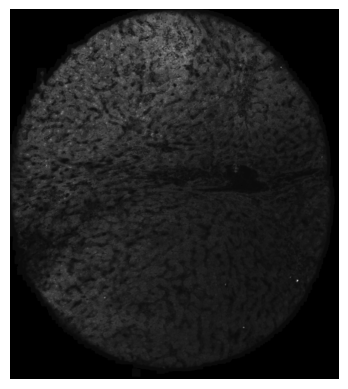

In [58]:
image=images[561]
plt.imshow(image[0], cmap='gray')  # cmap='gray' for grayscale images
plt.axis('off')  # Hide axes
plt.show()